In [1]:
import os
import shutil
import kaggle
import pandas as pd

def copy_kaggle_json(kaggle_json_path, kaggle_config_dir):
    """
    Copies the kaggle.json file to the Kaggle config directory.
    
    :param kaggle_json_path: The path where the kaggle.json file is located.
    :type kaggle_json_path: str
    :param kaggle_config_dir: The path of the Kaggle config directory where the kaggle.json will be copied.
    :type kaggle_config_dir: str
    """
    if not os.path.exists(kaggle_config_dir):
        os.makedirs(kaggle_config_dir)
    shutil.copy(os.path.join(kaggle_json_path, "kaggle.json"), os.path.join(kaggle_config_dir, "kaggle.json"))


class Scraper:
    """
    A class to collect data from Kaggle using the kaggle library.
    
    Attributes:
        dataset_slug (str): The slug of the dataset on Kaggle.
        csv_filename (str): The name of the CSV file to download from the dataset.
    """
    def __init__(self):
        """
        Constructor to initialize class attributes.
        """
        self.dataset_slug = "mexwell/steamgames"
        self.csv_filename = "games.csv"

    def scrape_data(self):
        """
        Authenticate with Kaggle and download the dataset files.
        """
        try:
            kaggle.api.authenticate()
            kaggle.api.dataset_download_files(self.dataset_slug, path='.', unzip=True)
        except kaggle.exceptions.KaggleError as e:
            print("Error occurred during data download:", e)

class Excellerator(Scraper):
    """
    A class to process data downloaded from Kaggle and export it to a CSV file.
    Inherits from the Scraper class.
    """
    def __init__(self):
        """
        Constructor to initialize the superclass.
        """
        super().__init__()

    def collect_and_process_data(self):
        """
        Collect data, process it, and export it to a CSV file.
        """
        self.scrape_data()

        if os.path.exists(self.csv_filename):
            df = pd.read_csv(self.csv_filename)
            print("Data loaded into DataFrame.")
            df.to_csv('SteamGames.csv', index=False)
            print("Data exported to 'SteamGames.csv'.")
            os.remove(self.csv_filename)
        else:
            print(f"Could not find '{self.csv_filename}'. Please make sure the file exists.")


if __name__ == "__main__":
    # Get the user's home directory path using the "USERPROFILE" environment variable
    user_home_dir = os.environ["USERPROFILE"]

    # Set the paths for kaggle.json file and the kaggle config directory
    kaggle_json_path = os.path.join(user_home_dir, "Downloads")
    kaggle_config_dir = os.path.join(user_home_dir, ".kaggle")

    # Copy the kaggle.json to the Kaggle config directory
    copy_kaggle_json(kaggle_json_path, kaggle_config_dir)

    # Create an instance of Excellerator and collect & process the data
    excellerator = Excellerator()
    excellerator.collect_and_process_data()

Data loaded into DataFrame.
Data exported to 'SteamGames.csv'.


In [2]:
tree_census = pd.read_csv('SteamGames.csv')
tree_census

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120,SUR5,"Apr 1, 2023",0 - 0,0,0,0.00,0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160,Prison Life 2,"Mar 30, 2023",0 - 20000,6,0,10.79,0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,0,5.99,0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,0,2.39,0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
tree_census_subset = tree_census[['Name', 'Release date', 'Estimated owners',
       'Required age', 'Price', 'DLC count', 'Metacritic score','User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags',]]
tree_census_subset

,Name,Release date,Estimated owners,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,0,0,6,11,NaN,30,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,0,0,53,5,NaN,12,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,0,0,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,0,0,3,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,0,0,50,8,NaN,17,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,SUR5,"Apr 1, 2023",0 - 0,0,0.00,0,0,0,0,0,NaN,6,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN
71712,Prison Life 2,"Mar 30, 2023",0 - 20000,0,10.79,0,0,0,9,1,NaN,83,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip..."
71713,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,5.99,0,0,0,1,0,NaN,3,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive..."
71714,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,2.39,0,0,0,0,0,NaN,0,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN


In [4]:
tree_census_subset = tree_census_subset.copy()
tree_census_subset['All reviews']= tree_census_subset['Positive'] + tree_census_subset['Negative']
tree_census_subset['Positive reviews percentage'] = (tree_census_subset['Positive']/tree_census_subset['All reviews']) * 100
tree_census_subset['Positive reviews percentage'] = tree_census_subset['Positive reviews percentage'].fillna(0).round(1)
tree_census_subset[['Positive reviews percentage', 'All reviews']]

,Positive reviews percentage,All reviews
0,35.3,17
1,91.4,58
2,0.0,0
3,100.0,3
4,86.2,58
...,...,...
71711,0.0,0
71712,90.0,10
71713,100.0,1
71714,0.0,0


In [5]:
def ReviewText(row):
    """
    Determines the review label based on 'Positive reviews percentage' and 'All reviews' values.

    :param row: A DataFrame row containing the 'Positive reviews percentage' and 'All reviews' columns.
    :type row: pandas.Series
    :return: The determined review label.
    :rtype: str
    """
    criteria = {
        (95, 500): "overwhelmingly positive",
        (85, 50): "very positive",
        (80, 10): "positive",
        (70, 10): "mostly positive",
        (40, 10): "mixed",
        (20, 10): "negative",
        (0, 500): "overwhelmingly negative",
        (0, 50): "very negative",
        (0, 10): "mostly negative",
        (0, 1): "Not enough reviews"
        
        
    }

    for threshold, label in criteria.items():
        if row['Positive reviews percentage'] >= threshold[0] and row['All reviews'] >= threshold[1]:
            return label

    return "No review"

def add_percent_sign(x):
    return f"{x:.1f}%"




tree_census_subset = tree_census_subset.copy()
tree_census_subset['Ratings'] = tree_census_subset.apply(ReviewText, axis=1)
tree_census_subset['Positive reviews percentage'] = tree_census_subset['Positive reviews percentage'].apply(add_percent_sign)
tree_census_subset

,Name,Release date,Estimated owners,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,...,Average playtime forever,Average playtime two weeks,Developers,Publishers,Categories,Genres,Tags,All reviews,Positive reviews percentage,Ratings
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,0,0,6,11,...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",17,35.3%,negative
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,0,0,53,5,...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",58,91.4%,very positive
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,0,0,0,0,...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,0,0.0%,No review
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,0,0,3,0,...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",3,100.0%,Not enough reviews
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,0,0,50,8,...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",58,86.2%,very positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,SUR5,"Apr 1, 2023",0 - 0,0,0.00,0,0,0,0,0,...,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,0,0.0%,No review
71712,Prison Life 2,"Mar 30, 2023",0 - 20000,0,10.79,0,0,0,9,1,...,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",10,90.0%,positive
71713,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,5.99,0,0,0,1,0,...,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",1,100.0%,Not enough reviews
71714,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,2.39,0,0,0,0,0,...,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,0,0.0%,No review


In [6]:
"""
    Calculate the most possible revenue for a tree census data row based on the following conditions:
    If the 'Estimated owners' column has the value '0 - 20000' and the 'All reviews' column is 0,
       the most possible revenue is calculated as 63 times the 'Price' column value.
    If the above condition is not met, the most possible revenue is calculated as the product of
       'All reviews' multiplied by 63 and then by the 'Price' column value.

    
    :param row: A row from the tree census DataFrame containing 'Estimated owners', 'All reviews', and 'Price' columns.
    :type row: pandas.Series

    :return: The most possible revenue value.
    :rtype: float
    """
def calculate_most_possible_revenue(row):
    if row['Estimated owners'] == '0 - 20000' and row['All reviews'] == 0:
        return round(63 * row['Price'], 2)
    else:
        return round((row['All reviews'] * 63) * row['Price'], 2)



tree_census_subset = tree_census_subset.copy()
split_revenue = tree_census_subset['Estimated owners'].str.split(' - ', expand=True)
split_revenue = split_revenue.apply(pd.to_numeric)
revenue_columns = split_revenue.mul(tree_census_subset['Price'], axis=0)
revenue_columns = revenue_columns.round(2)
tree_census_subset['Most possible revenue [USD $]'] = tree_census_subset.apply(calculate_most_possible_revenue, axis=1)
tree_census_subset[['Minimum revenue possible [USD $]', 'Maximum revenue possible [USD $]']] = revenue_columns
tree_census_subset

,Name,Release date,Estimated owners,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,...,Publishers,Categories,Genres,Tags,All reviews,Positive reviews percentage,Ratings,Most possible revenue [USD $],Minimum revenue possible [USD $],Maximum revenue possible [USD $]
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,0,0,0,6,11,...,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",17,35.3%,negative,21409.29,0.0,399800.0
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,0,0,0,53,5,...,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",58,91.4%,very positive,3617.46,0.0,19800.0
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,0,0,0,0,0,...,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,0,0.0%,No review,314.37,0.0,99800.0
3,Henosis™,"Jul 23, 2020",0 - 20000,0,5.99,0,0,0,3,0,...,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",3,100.0%,Not enough reviews,1132.11,0.0,119800.0
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0.00,0,0,0,50,8,...,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",58,86.2%,very positive,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,SUR5,"Apr 1, 2023",0 - 0,0,0.00,0,0,0,0,0,...,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,0,0.0%,No review,0.00,0.0,0.0
71712,Prison Life 2,"Mar 30, 2023",0 - 20000,0,10.79,0,0,0,9,1,...,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",10,90.0%,positive,6797.70,0.0,215800.0
71713,Architecture Zeitgeist,"Mar 27, 2023",0 - 20000,0,5.99,0,0,0,1,0,...,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",1,100.0%,Not enough reviews,377.37,0.0,119800.0
71714,Girl's Way to Survive 2: Bloody Museum,"Apr 2, 2023",0 - 0,0,2.39,0,0,0,0,0,...,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,0,0.0%,No review,0.00,0.0,0.0


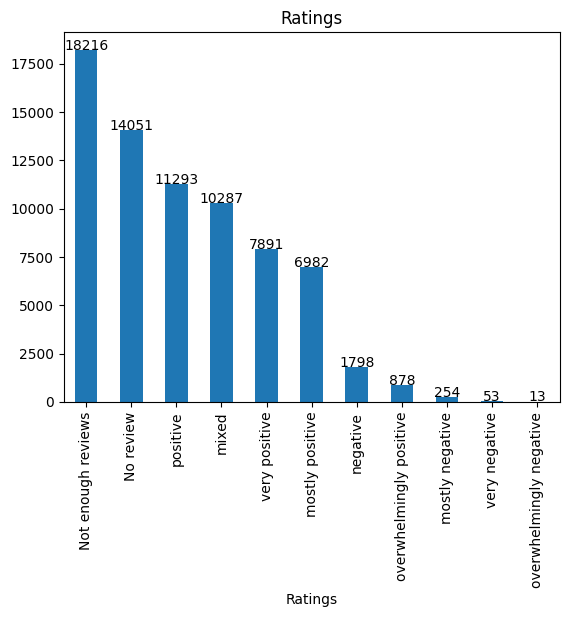

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ratings_count = tree_census_subset['Ratings'].value_counts()
bar = ratings_count.plot(kind='bar')
plt.title('Ratings')

for i in bar.patches:
    bar.text(i.get_x() + i.get_width() / 2, i.get_height() + 10, str(i.get_height()), ha='center')

plt.show()

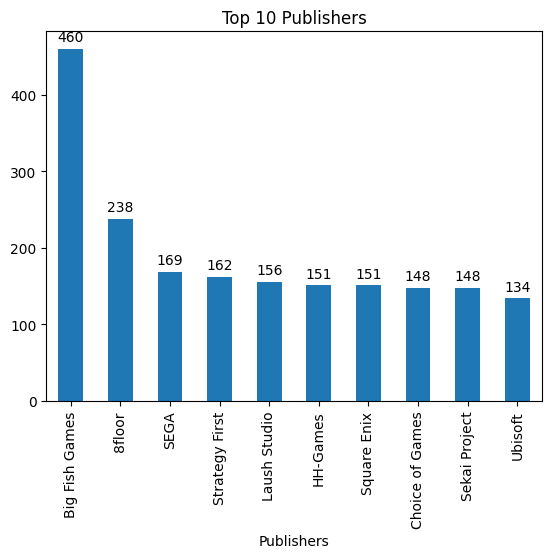

In [8]:
publishers_count = tree_census_subset['Publishers'].value_counts()
sorted_publishers = publishers_count.sort_values(ascending=False)
top_10_publishers = sorted_publishers.head(10)
bar2 = top_10_publishers.plot(kind='bar')
plt.title('Top 10 Publishers')

for i in bar2.patches:
    bar2.text(i.get_x() + i.get_width() / 2, i.get_height() + 10, str(i.get_height()), ha='center')

plt.show()

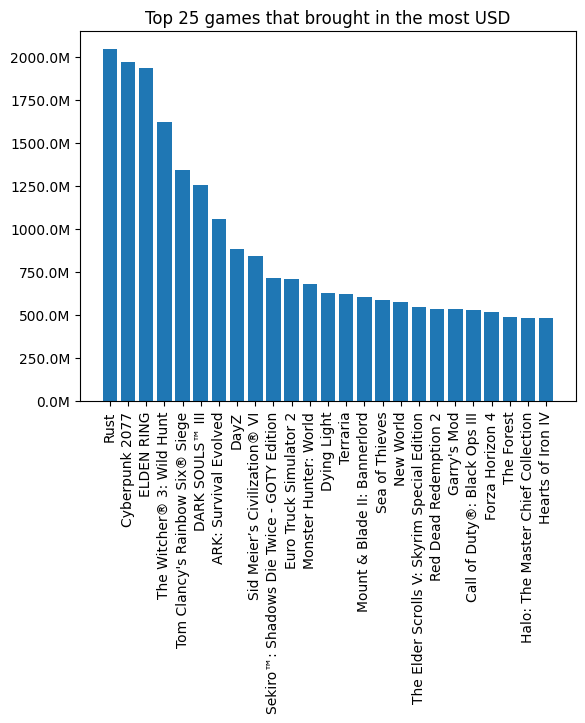

In [9]:
def millions_formatter(x, pos):
    """
    Custom formatter function to format tick labels in millions.

    :param x: The tick value.
    :type x: float

    :param pos: The tick position.
    :type pos: int

    :return: The formatted tick label in millions.
    :rtype: str
    """
    return f'{x / 1e6:.1f}M'

    
sorted_names = tree_census_subset.sort_values(by='Most possible revenue [USD $]', ascending=False)
plt.title('Top 25 games that brought in the most USD')
top_25_names = sorted_names.head(25)
plt.bar(top_25_names['Name'], top_25_names['Most possible revenue [USD $]'])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.xticks(rotation=90)
plt.show()

In [10]:
tree_census_subset = tree_census_subset[['Name', 'Release date', 'All reviews', 'Positive', 'Negative',
       'Positive reviews percentage', 'Ratings', 'Price',
       'Most possible revenue [USD $]', 'Minimum revenue possible [USD $]',
       'Maximum revenue possible [USD $]', 'Estimated owners', 'Required age',
       'DLC count', 'Metacritic score','Achievements', 'Recommendations',
       'Average playtime forever', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags']]
tree_census_subset.to_csv('SteamGameFinal.csv', index=False)
print("The table exported to 'SteamGameFinal.csv'.")

The table exported to 'SteamGameFinal.csv'.
